In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

energia2022 = pd.read_csv('daasbstp2023/train/energia_202201-202212.csv', encoding='latin-1')    
energia2021 = pd.read_csv('daasbstp2023/train/energia_202109-202112.csv', encoding='latin-1')

energia2023_test = pd.read_csv('daasbstp2023/test/energia_202301-202304.csv', encoding='latin-1')

meteo2022 = pd.read_csv('daasbstp2023/train/meteo_202201-202212.csv', encoding='latin-1')
meteo2021 = pd.read_csv('daasbstp2023/train/meteo_202109-202112.csv', encoding='latin-1')

meteo2023_test = pd.read_csv('daasbstp2023/test/meteo_202301-202304.csv', encoding='latin-1')

#extra
extra_data = pd.read_csv('dados_extra.csv', encoding='latin-1')


# Converter datas
energia2021['Data'] = pd.to_datetime(energia2021['Data'], format='%Y-%m-%d')
energia2021['Hora'] = pd.to_datetime(energia2021['Hora'], format='%H')

energia2021['dt_converted'] = energia2021['Data'] + pd.to_timedelta(energia2021['Hora'].dt.hour, unit='h')

energia2021['dt_converted'] = pd.to_datetime(energia2021['dt_converted'], unit='s', utc=True)


energia2022['Data'] = pd.to_datetime(energia2022['Data'], format='%Y-%m-%d')
energia2022['Hora'] = pd.to_datetime(energia2022['Hora'], format='%H')

energia2022['dt_converted'] = energia2022['Data'] + pd.to_timedelta(energia2022['Hora'].dt.hour, unit='h')

energia2022['dt_converted'] = pd.to_datetime(energia2022['dt_converted'], unit='s', utc=True)


energia2023_test['Data'] = pd.to_datetime(energia2023_test['Data'], format='%Y-%m-%d')
energia2023_test['Hora'] = pd.to_datetime(energia2023_test['Hora'], format='%H')

energia2023_test['dt_converted'] = energia2023_test['Data'] + pd.to_timedelta(energia2023_test['Hora'].dt.hour, unit='h')

energia2023_test['dt_converted'] = pd.to_datetime(energia2023_test['dt_converted'], unit='s', utc=True)



extra_data['dt_converted'] = pd.to_datetime(extra_data['datetime'],utc=True)
# ---- DROPS NECESSARIOS NOS EXTRA ----
extra_data = extra_data.drop(['name', 'preciptype','stations','snow','snowdepth','icon','datetime'], axis=1)


meteo2021['dt_converted'] = pd.to_datetime(meteo2021['dt'], unit='s', utc=True)
meteo2022['dt_converted'] = pd.to_datetime(meteo2022['dt'], unit='s', utc=True)
meteo2023_test['dt_converted'] = pd.to_datetime(meteo2023_test['dt'], unit='s', utc=True)

# Merge datasets based on datetime
data21 = pd.merge(energia2021, meteo2021, on='dt_converted', how='inner')
data22 = pd.merge(energia2022, meteo2022, on='dt_converted', how='inner')

test = pd.merge(energia2023_test, meteo2023_test, on='dt_converted', how='outer')


# Drop columns
data21.drop('sea_level', axis=1, inplace=True)
data21.drop('grnd_level', axis=1, inplace=True)
data21.drop('rain_1h', axis=1, inplace=True)
data21.drop('Data', axis=1, inplace=True)
data21.drop('Hora', axis=1, inplace=True)
data21.drop('dt_iso', axis=1, inplace=True)
data21.drop('dt', axis=1, inplace=True)

data22.drop('sea_level', axis=1, inplace=True)
data22.drop('grnd_level', axis=1, inplace=True)
data22.drop('rain_1h', axis=1, inplace=True)
data22.drop('Data', axis=1, inplace=True)
data22.drop('Hora', axis=1, inplace=True)
data22.drop('dt_iso', axis=1, inplace=True)
data22.drop('dt', axis=1, inplace=True)

test.drop('sea_level', axis=1, inplace=True)
test.drop('grnd_level', axis=1, inplace=True)
test.drop('rain_1h', axis=1, inplace=True)
test.drop('Data', axis=1, inplace=True)
test.drop('Hora', axis=1, inplace=True)
test.drop('dt_iso', axis=1, inplace=True)
test.drop('dt', axis=1, inplace=True)

data21.drop('city_name', axis=1, inplace=True)
data22.drop('city_name', axis=1, inplace=True)
test.drop('city_name', axis=1, inplace=True)

train = pd.concat([data21, data22], axis=0)

train = pd.merge(train, extra_data, on='dt_converted', how='inner')

# separar data em ano, mes e dia
train['ano'] = train['dt_converted'].apply(lambda x: x.year)
train['mes'] = train['dt_converted'].apply(lambda x: x.month)
train['dia'] = train['dt_converted'].apply(lambda x: x.day)
train['hora'] = train['dt_converted'].apply(lambda x: x.hour)
train['dia da semana'] = train['dt_converted'].apply(lambda x: x.weekday())


test['ano'] = test['dt_converted'].apply(lambda x: x.year)
test['mes'] = test['dt_converted'].apply(lambda x: x.month)
test['dia'] = test['dt_converted'].apply(lambda x: x.day)
test['hora'] = test['dt_converted'].apply(lambda x: x.hour)
test['dia da semana'] = test['dt_converted'].apply(lambda x: x.weekday())


train.drop('dt_converted', axis=1, inplace=True)
test.drop('dt_converted', axis=1, inplace=True)

lb_make = LabelEncoder()
train["weather_description"] = lb_make.fit_transform(train["weather_description"])
test["weather_description"] = lb_make.fit_transform(test["weather_description"])



train["weather_description"].unique()

train['Injeção na rede (kWh)'] = train['Injeção na rede (kWh)'].fillna('None')

dict_target = {"None": 0, "Low": 1, "Medium": 2, "High": 3, "Very High": 4}
train["Injeção na rede (kWh)"] = train["Injeção na rede (kWh)"].map(dict_target)

In [285]:
energia2023_test.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),dt_converted
0,2023-01-01,1900-01-01 00:00:00,0.0,0.467,0.0,2023-01-01 00:00:00+00:00
1,2023-01-01,1900-01-01 01:00:00,0.0,0.577,0.0,2023-01-01 01:00:00+00:00
2,2023-01-01,1900-01-01 02:00:00,0.0,0.346,0.0,2023-01-01 02:00:00+00:00
3,2023-01-01,1900-01-01 03:00:00,0.0,0.270,0.0,2023-01-01 03:00:00+00:00
4,2023-01-01,1900-01-01 04:00:00,0.0,0.252,0.0,2023-01-01 04:00:00+00:00


In [286]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11015 entries, 0 to 11014
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11015 non-null  float64
 1   Horário Económico (kWh)  11015 non-null  float64
 2   Autoconsumo (kWh)        11015 non-null  float64
 3   Injeção na rede (kWh)    11015 non-null  int64  
 4   temp_x                   11015 non-null  float64
 5   feels_like               11015 non-null  float64
 6   temp_min                 11015 non-null  float64
 7   temp_max                 11015 non-null  float64
 8   pressure                 11015 non-null  int64  
 9   humidity_x               11015 non-null  int64  
 10  wind_speed               11015 non-null  float64
 11  clouds_all               11015 non-null  int64  
 12  weather_description      11015 non-null  int32  
 13  temp_y                   11015 non-null  float64
 14  feelslike             

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),temp_x,feels_like,temp_min,temp_max,pressure,humidity_x,...,visibility,solarradiation,solarenergy,uvindex,severerisk,ano,mes,dia,hora,dia da semana
count,11015.000000,11015.000000,11015.000000,11015.000000,11015.000000,11015.000000,11015.000000,11015.000000,11015.000000,11015.000000,...,11015.000000,11003.000000,11003.000000,11003.000000,8531.000000,11015.000000,11015.000000,11015.000000,11015.000000,11015.000000
mean,0.202296,0.159728,0.117325,0.759056,16.183278,15.827159,14.195212,17.288448,1018.396641,76.569859,...,10.241371,170.656521,0.613642,1.692266,9.813035,2021.795188,7.433954,15.802905,11.500953,3.004085
std,0.349489,0.271800,0.176767,1.281956,5.757155,6.265070,4.956215,6.164859,6.203659,16.268750,...,3.051845,261.777286,0.942729,2.627861,1.854837,0.403582,3.578248,8.835662,6.922092,1.994518
min,0.000000,0.000000,0.000000,0.000000,0.320000,-2.190000,-0.640000,1.330000,994.000000,19.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,2021.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,12.080000,11.505000,10.720000,12.890000,1015.000000,66.000000,...,9.600000,0.000000,0.000000,0.000000,10.000000,2022.000000,4.000000,8.000000,6.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,15.630000,15.230000,14.230000,16.260000,1018.000000,81.000000,...,10.000000,2.000000,0.000000,0.000000,10.000000,2022.000000,8.000000,16.000000,12.000000,3.000000
75%,0.314000,0.288000,0.227000,2.000000,19.270000,19.260000,17.490000,20.340000,1022.000000,91.000000,...,11.100000,295.000000,1.100000,3.000000,10.000000,2022.000000,11.000000,23.000000,17.500000,5.000000
max,3.251000,6.978000,1.192000,4.000000,40.850000,41.330000,36.720000,41.450000,1034.000000,100.000000,...,30.800000,991.000000,3.600000,10.000000,60.000000,2022.000000,12.000000,31.000000,23.000000,6.000000


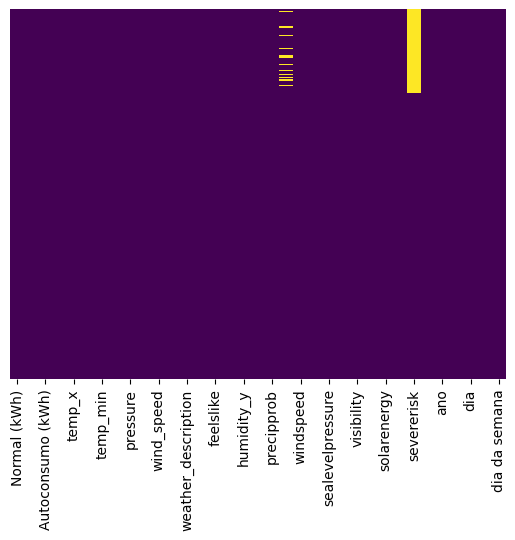

In [287]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
train.describe()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_description,ano,mes,dia,hora,dia da semana
count,2256.000000,2256.000000,2256.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,2256.000000,2256.0,2256.000000,2256.000000,2256.000000,2256.000000
mean,0.268060,0.226809,0.119439,10.599606,9.543265,9.177917,11.643813,1023.493721,75.639840,2.873613,44.489726,5.620124,2023.0,2.085106,14.978723,11.500000,2.978723
std,0.464323,0.375752,0.190601,3.715156,4.191224,4.021176,3.596882,6.650873,17.415468,1.620450,42.972438,2.392843,0.0,0.907143,8.925982,6.923721,2.026759
min,0.000000,0.000000,0.000000,0.930000,-1.790000,-0.850000,3.340000,1006.000000,23.000000,0.120000,0.000000,0.000000,2023.0,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,7.877500,6.217500,6.247500,8.900000,1020.000000,62.000000,1.800000,0.000000,4.000000,2023.0,1.000000,7.000000,5.750000,1.000000
50%,0.000000,0.000000,0.000000,10.950000,10.135000,9.710000,11.820000,1024.000000,81.000000,2.490000,35.000000,7.000000,2023.0,2.000000,15.000000,11.500000,3.000000
75%,0.398750,0.336000,0.237250,13.292500,12.742500,12.320000,14.040000,1029.000000,91.000000,3.500000,96.000000,7.000000,2023.0,3.000000,23.000000,17.250000,5.000000
max,3.381000,2.771000,1.161000,20.610000,19.790000,20.010000,22.010000,1036.000000,97.000000,10.320000,100.000000,8.000000,2023.0,4.000000,31.000000,23.000000,6.000000


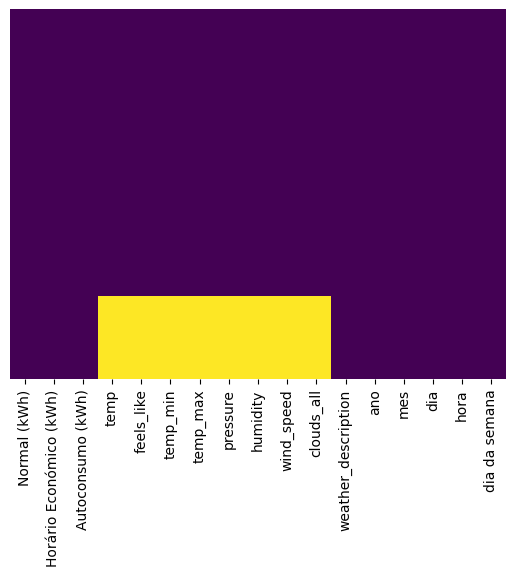

In [288]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')
test.describe()

In [289]:
# test["temp"] = test["temp"].interpolate(method='linear', axis=0)
# test["temp_min"] = test["temp_min"].interpolate(method='linear', axis=0)
# test["temp_max"] = test["temp_max"].interpolate(method='linear', axis=0)
# test["pressure"] = test["pressure"].interpolate(method='linear',  axis=0)
# test["humidity"] = test["humidity"].interpolate(method='linear',  axis=0)
# test["wind_speed"] = test["wind_speed"].interpolate(method='linear',  axis=0)
# test["clouds_all"] = test["clouds_all"].interpolate(method='linear',  axis=0)

In [290]:
test.head()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_description,ano,mes,dia,hora,dia da semana
0,0.0,0.467,0.0,12.93,12.76,12.72,13.43,1019.0,95.0,2.02,100.0,4,2023,1,1,0,6
1,0.0,0.577,0.0,13.49,13.38,13.43,13.90,1018.0,95.0,2.18,100.0,4,2023,1,1,1,6
2,0.0,0.346,0.0,13.55,13.44,13.48,14.82,1017.0,95.0,2.88,100.0,4,2023,1,1,2,6
3,0.0,0.270,0.0,13.61,13.51,12.01,14.82,1016.0,95.0,3.63,100.0,4,2023,1,1,3,6
4,0.0,0.252,0.0,13.59,13.49,12.01,14.82,1015.0,95.0,4.58,100.0,4,2023,1,1,4,6


In [291]:
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# # Lista das colunas que você deseja prever independentemente
# columns_to_predict = ['temp', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'clouds_all']

# #o dataset de treino nao pode ter valores nulos
# test2 = test.dropna(subset=columns_to_predict)

# #dropar colunas que nao serao usadas para prever "columns_to_predict"
# # test3 = test.drop(columns_to_predict, axis=1)
# # Iterar sobre as colunas e treinar modelos separados
# for column in columns_to_predict:
    
#     train_data = test2.dropna(subset=[column])
#     predict_data = test[test[column].isnull()]
    
#     for i in columns_to_predict:
#         if i != column:
#             train_data = train_data.drop(i, axis=1)
#         predict_data = predict_data.drop(i, axis=1)
        
    
#     X_train = train_data.drop(column, axis=1)
#     y_train = train_data[column]

#     # Treinar o modelo (usando regressão linear neste exemplo)
#     model = DecisionTreeRegressor()
#     model.fit(X_train, y_train)

#     # Fazer previsões para os valores ausentes
#     predictions = model.predict(predict_data)

#     # Adicionar as previsões ao DataFrame original
#     test.loc[test[column].isnull(), column] = predictions
    
# sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [292]:
test.describe()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_description,ano,mes,dia,hora,dia da semana
count,2256.000000,2256.000000,2256.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,2256.000000,2256.0,2256.000000,2256.000000,2256.000000,2256.000000
mean,0.268060,0.226809,0.119439,10.599606,9.543265,9.177917,11.643813,1023.493721,75.639840,2.873613,44.489726,5.620124,2023.0,2.085106,14.978723,11.500000,2.978723
std,0.464323,0.375752,0.190601,3.715156,4.191224,4.021176,3.596882,6.650873,17.415468,1.620450,42.972438,2.392843,0.0,0.907143,8.925982,6.923721,2.026759
min,0.000000,0.000000,0.000000,0.930000,-1.790000,-0.850000,3.340000,1006.000000,23.000000,0.120000,0.000000,0.000000,2023.0,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,7.877500,6.217500,6.247500,8.900000,1020.000000,62.000000,1.800000,0.000000,4.000000,2023.0,1.000000,7.000000,5.750000,1.000000
50%,0.000000,0.000000,0.000000,10.950000,10.135000,9.710000,11.820000,1024.000000,81.000000,2.490000,35.000000,7.000000,2023.0,2.000000,15.000000,11.500000,3.000000
75%,0.398750,0.336000,0.237250,13.292500,12.742500,12.320000,14.040000,1029.000000,91.000000,3.500000,96.000000,7.000000,2023.0,3.000000,23.000000,17.250000,5.000000
max,3.381000,2.771000,1.161000,20.610000,19.790000,20.010000,22.010000,1036.000000,97.000000,10.320000,100.000000,8.000000,2023.0,4.000000,31.000000,23.000000,6.000000


In [293]:
extra_data.nunique()

temp                  323
feelslike             340
dew                   249
humidity             4879
precip                692
precipprob              2
windgust              346
windspeed             387
winddir               375
sealevelpressure      377
cloudcover            971
visibility            224
solarradiation       1835
solarenergy            37
uvindex                11
severerisk              7
conditions              6
dt_converted        13270
dtype: int64

In [294]:
extra_data.head()

,temp,feelslike,dew,humidity,precip,precipprob,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,dt_converted
0,12.8,12.8,10.2,84.33,0.0,0,10.8,6.6,38.0,1027.7,93.9,10.0,0.0,0.0,0.0,NaN,Overcast,2021-09-29 00:00:00+00:00
1,12.7,12.7,10.3,85.57,0.0,0,9.0,6.1,43.0,1027.7,50.0,14.1,0.0,0.0,0.0,NaN,Partially cloudy,2021-09-29 01:00:00+00:00
2,12.7,12.7,10.4,85.90,0.0,0,8.3,8.1,53.0,1027.7,80.9,10.0,0.0,0.0,0.0,NaN,Partially cloudy,2021-09-29 02:00:00+00:00
3,11.9,11.9,9.9,87.31,0.0,0,6.8,6.0,43.0,1027.6,80.8,10.0,0.0,0.0,0.0,NaN,Partially cloudy,2021-09-29 03:00:00+00:00
4,11.7,11.7,10.0,89.73,0.0,0,9.0,4.7,22.0,1027.4,94.2,10.0,0.0,0.0,0.0,NaN,Overcast,2021-09-29 04:00:00+00:00


In [295]:
extra_data.isnull().sum()

temp                   0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
windgust             579
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation        12
solarenergy           12
uvindex               12
severerisk          2484
conditions             0
dt_converted           0
dtype: int64

In [296]:
extra_data.nunique()

temp                  323
feelslike             340
dew                   249
humidity             4879
precip                692
precipprob              2
windgust              346
windspeed             387
winddir               375
sealevelpressure      377
cloudcover            971
visibility            224
solarradiation       1835
solarenergy            37
uvindex                11
severerisk              7
conditions              6
dt_converted        13270
dtype: int64

## Outliers

In [297]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             2256 non-null   float64
 1   Horário Económico (kWh)  2256 non-null   float64
 2   Autoconsumo (kWh)        2256 non-null   float64
 3   temp                     1752 non-null   float64
 4   feels_like               1752 non-null   float64
 5   temp_min                 1752 non-null   float64
 6   temp_max                 1752 non-null   float64
 7   pressure                 1752 non-null   float64
 8   humidity                 1752 non-null   float64
 9   wind_speed               1752 non-null   float64
 10  clouds_all               1752 non-null   float64
 11  weather_description      2256 non-null   int32  
 12  ano                      2256 non-null   int64  
 13  mes                      2256 non-null   int64  
 14  dia                     

count    11015.000000
mean         0.202296
std          0.349489
min          0.000000
25%          0.000000
50%          0.000000
75%          0.314000
max          3.251000
Name: Normal (kWh), dtype: float64

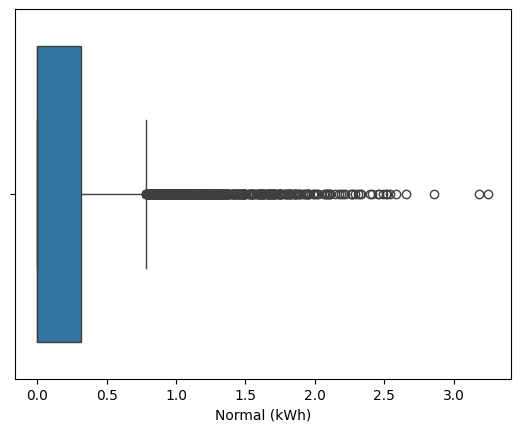

In [298]:
sns.boxplot(x=train["Normal (kWh)"])
train["Normal (kWh)"].describe()

In [299]:
# train.loc[train['Normal (kWh)'] > 3, 'Normal (kWh)'] = 3
# test.loc[train.bmi > 2.5, 'Normal (kWh)'] = np.nan
# test.fillna(2.5, inplace=True)

count    11015.000000
mean         0.159728
std          0.271800
min          0.000000
25%          0.000000
50%          0.000000
75%          0.288000
max          6.978000
Name: Horário Económico (kWh), dtype: float64

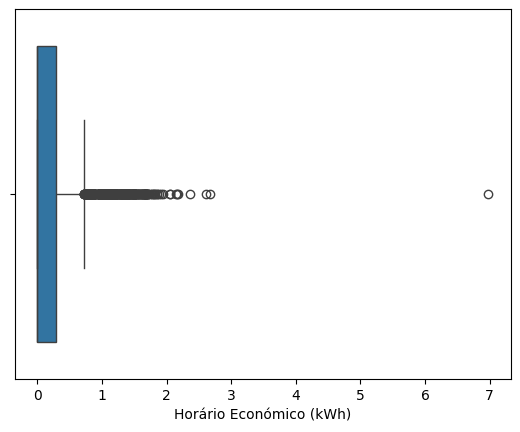

In [300]:
sns.boxplot(x=train["Horário Económico (kWh)"])
train["Horário Económico (kWh)"].describe()

In [301]:
# train.loc[train['Horário Económico (kWh)'] > 4, 'Horário Económico (kWh)'] = 4

count    11015.000000
mean         0.117325
std          0.176767
min          0.000000
25%          0.000000
50%          0.000000
75%          0.227000
max          1.192000
Name: Autoconsumo (kWh), dtype: float64

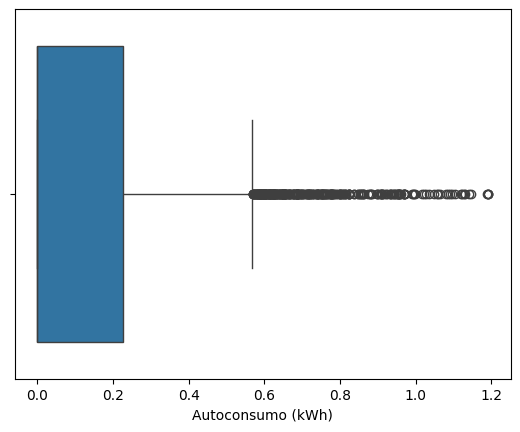

In [302]:
sns.boxplot(x=train["Autoconsumo (kWh)"])
train["Autoconsumo (kWh)"].describe()

In [303]:
# train.loc[train['Autoconsumo (kWh)'] > 1.1, 'Autoconsumo (kWh)'] = 1.1

In [304]:
sns.boxplot(x=train["temp"])
train["temp"].describe()

KeyError: 'temp'

count    11016.000000
mean        15.826868
std          6.264860
min         -2.190000
25%         11.507500
50%         15.230000
75%         19.260000
max         41.330000
Name: feels_like, dtype: float64

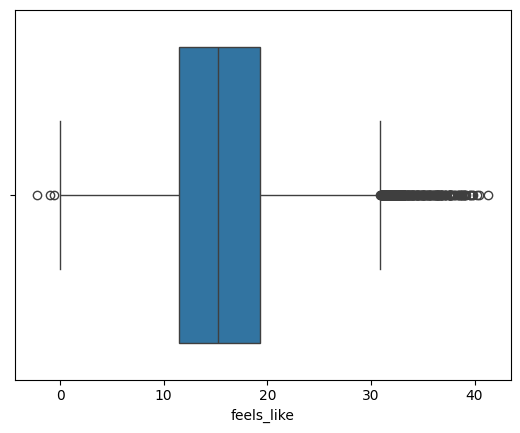

In [ ]:
sns.boxplot(x=train["feels_like"])
train["feels_like"].describe()

count    11016.000000
mean        14.195064
std          4.956014
min         -0.640000
25%         10.720000
50%         14.230000
75%         17.490000
max         36.720000
Name: temp_min, dtype: float64

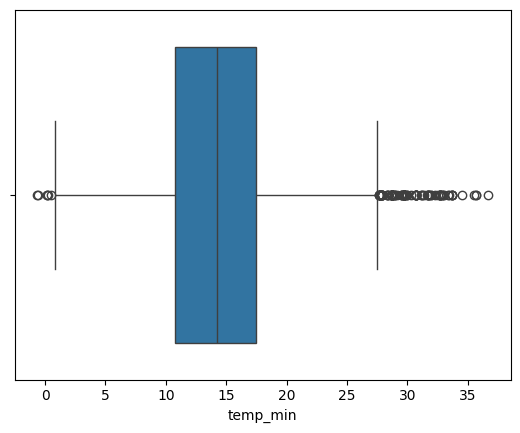

In [ ]:
sns.boxplot(x=train["temp_min"])
train["temp_min"].describe()

count    11016.000000
mean        17.288098
std          6.164689
min          1.330000
25%         12.890000
50%         16.260000
75%         20.340000
max         41.450000
Name: temp_max, dtype: float64

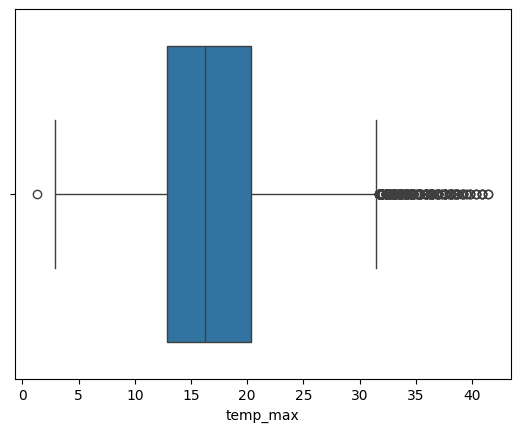

In [ ]:
sns.boxplot(x=train["temp_max"])
train["temp_max"].describe()

count    11016.000000
mean      1018.396605
std          6.203379
min        994.000000
25%       1015.000000
50%       1018.000000
75%       1022.000000
max       1034.000000
Name: pressure, dtype: float64

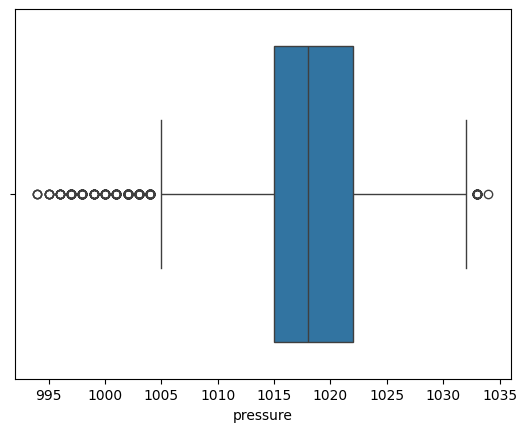

In [ ]:
sns.boxplot(x=train["pressure"])
train["pressure"].describe()

count    11016.000000
mean        76.570715
std         16.268260
min         19.000000
25%         66.000000
50%         81.000000
75%         91.000000
max        100.000000
Name: humidity, dtype: float64

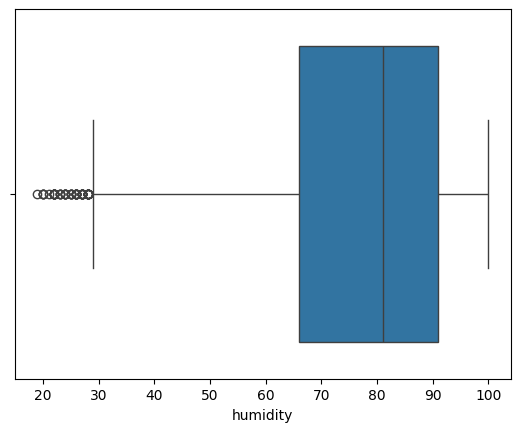

In [ ]:
sns.boxplot(x=train["humidity"])
train["humidity"].describe()

count    11016.000000
mean         2.672039
std          1.476158
min          0.060000
25%          1.620000
50%          2.400000
75%          3.420000
max         11.100000
Name: wind_speed, dtype: float64

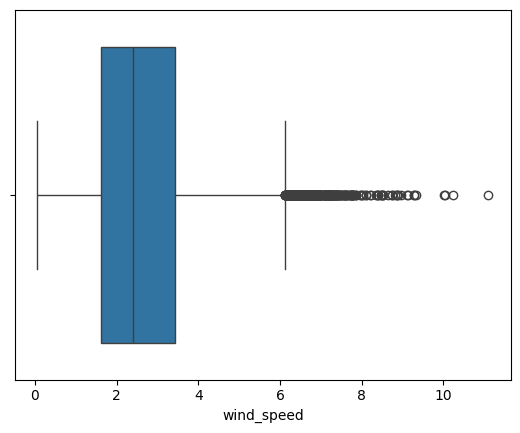

In [ ]:
sns.boxplot(x=train["wind_speed"])
train["wind_speed"].describe()

count    11016.000000
mean        54.000908
std         40.553002
min          0.000000
25%          7.000000
50%         60.000000
75%         98.000000
max        100.000000
Name: clouds_all, dtype: float64

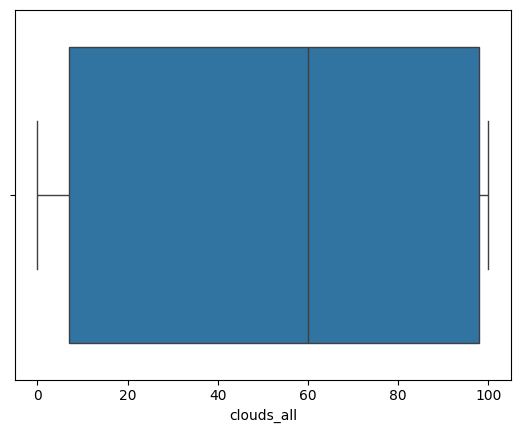

In [ ]:
sns.boxplot(x=train["clouds_all"])
train["clouds_all"].describe()

# Drop de colunas 

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11016 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horário Económico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   Injeção na rede (kWh)    11016 non-null  int64  
 4   temp                     11016 non-null  float64
 5   feels_like               11016 non-null  float64
 6   temp_min                 11016 non-null  float64
 7   temp_max                 11016 non-null  float64
 8   pressure                 11016 non-null  int64  
 9   humidity                 11016 non-null  int64  
 10  wind_speed               11016 non-null  float64
 11  clouds_all               11016 non-null  int64  
 12  weather_description      11016 non-null  int32  
 13  ano                      11016 non-null  int64  
 14  mes                      110

In [ ]:
train['Injeção na rede (kWh)'] =train['Injeção na rede (kWh)'].astype('float64')
test['weather_description']=test['weather_description'].astype('int64')
train['weather_description']=train['weather_description'].astype('int64')




#--------- DROPS TESTADOS -------------
test.drop('feels_like', axis=1, inplace=True)
train.drop('feels_like', axis=1, inplace=True)

train.drop('dia', axis=1, inplace=True)
test.drop('dia', axis=1, inplace=True)

train.drop('wind_speed', axis=1, inplace=True)
test.drop('wind_speed', axis=1, inplace=True)
#--------------------------------------




# Correlação

<Axes: >

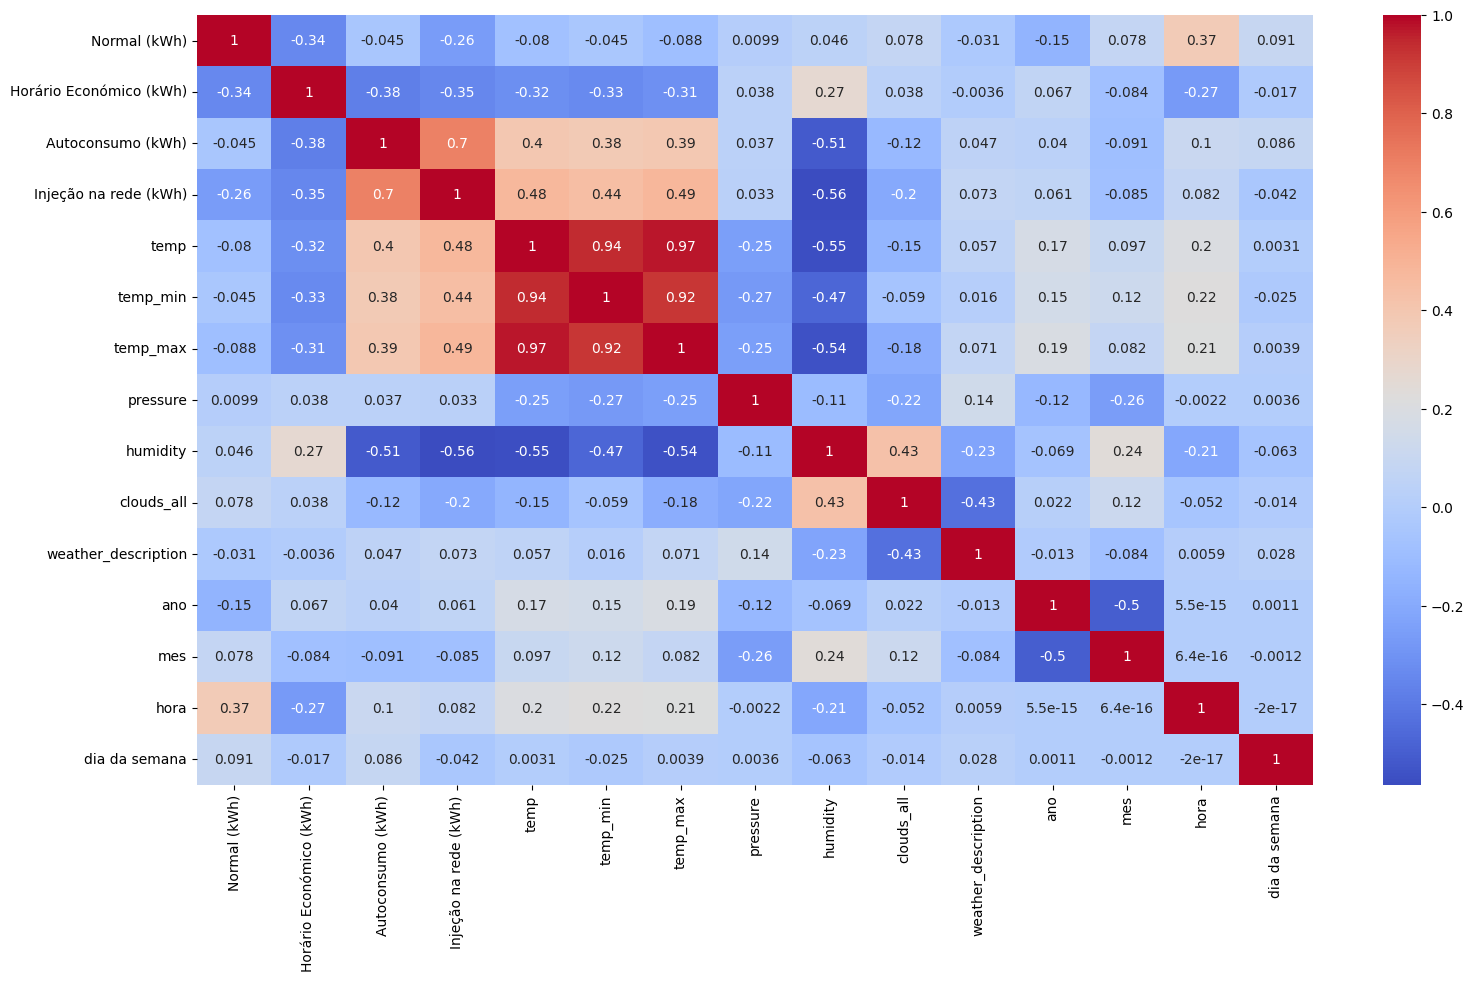

In [ ]:
plt.subplots(figsize=(18,10))
train_corr = train.corr(method='pearson')
sns.heatmap(train_corr, annot = True, cmap='coolwarm')

## Normalização

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             2256 non-null   float64
 1   Horário Económico (kWh)  2256 non-null   float64
 2   Autoconsumo (kWh)        2256 non-null   float64
 3   temp                     1752 non-null   float64
 4   temp_min                 1752 non-null   float64
 5   temp_max                 1752 non-null   float64
 6   pressure                 1752 non-null   float64
 7   humidity                 1752 non-null   float64
 8   clouds_all               1752 non-null   float64
 9   weather_description      2256 non-null   int64  
 10  ano                      2256 non-null   int64  
 11  mes                      2256 non-null   int64  
 12  hora                     2256 non-null   int64  
 13  dia da semana            2256 non-null   int64  
dtypes: float64(9), int64(5)


In [ ]:
train.describe()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),temp,temp_min,temp_max,pressure,humidity,clouds_all,weather_description,ano,mes,hora,dia da semana
count,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000
mean,0.202278,0.159714,0.117314,0.758987,16.182991,14.195064,17.288098,1018.396605,76.570715,54.000908,4.374818,2021.795207,7.433551,11.500000,3.004357
std,0.349478,0.271792,0.176762,1.281918,5.756972,4.956014,6.164689,6.203379,16.268260,40.553002,2.403911,0.403569,3.578335,6.922501,1.994632
min,0.000000,0.000000,0.000000,0.000000,0.320000,-0.640000,1.330000,994.000000,19.000000,0.000000,0.000000,2021.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,12.080000,10.720000,12.890000,1015.000000,66.000000,7.000000,3.000000,2022.000000,4.000000,5.750000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,15.625000,14.230000,16.260000,1018.000000,81.000000,60.000000,5.000000,2022.000000,8.000000,11.500000,3.000000
75%,0.314000,0.288000,0.227000,2.000000,19.270000,17.490000,20.340000,1022.000000,91.000000,98.000000,7.000000,2022.000000,11.000000,17.250000,5.000000
max,3.251000,6.978000,1.192000,4.000000,40.850000,36.720000,41.450000,1034.000000,100.000000,100.000000,7.000000,2022.000000,12.000000,23.000000,6.000000


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense#, Dropout, BatchNormalization
from scikeras.wrappers import KerasRegressor#, KerasClassifier

In [ ]:
train_feat = train.drop(['Injeção na rede (kWh)'], axis = 1)
train_target = train[['Injeção na rede (kWh)']]

x_train = train_feat
y_train= np.ravel(train_target) 

### Oversampling

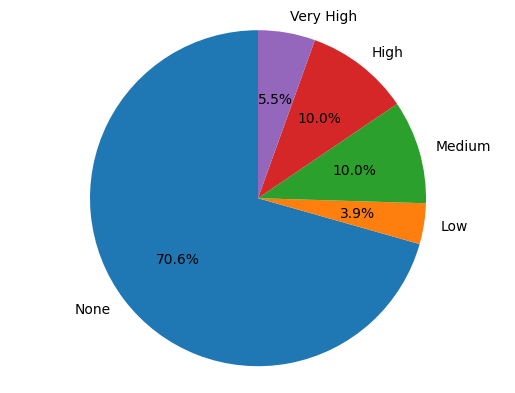

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



# Contar o número de instâncias na classe 1 ("low")
# count_class_1 = sum(y_train == 1)

# # Criar uma instância do RandomOverSampler com a proporção desejada
# oversampler = RandomOverSampler(sampling_strategy={1: int(count_class_1 * 1.5)}, random_state=42)

# # Aplicar oversampling apenas na classe 1 do conjunto de treino
# x_train, y_train = oversampler.fit_resample(x_train, y_train)



labels = 'None', 'Low', 'Medium', 'High', 'Very High'
sizes = [train['Injeção na rede (kWh)'].value_counts()[0], train['Injeção na rede (kWh)'].value_counts()[1], train['Injeção na rede (kWh)'].value_counts()[2], train['Injeção na rede (kWh)'].value_counts()[3], train['Injeção na rede (kWh)'].value_counts()[4]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')

plt.show()


# Normalização

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler(feature_range=(0, 1)).fit(train_feat)
scaler_Y = MinMaxScaler(feature_range=(0, 1)).fit(train_target)
feat_scaled = pd.DataFrame(scaler_X.transform(train_feat[train_feat.columns]), columns=train_feat.columns)
target_scaled = pd.DataFrame(scaler_Y.transform(train_target[train_target.columns]), columns=train_target.columns)

# split train 

In [ ]:
# x_train2, x_test2, y_train2, y_test2 = train_test_split(train_feat, train_target, test_size=0.2, random_state=1000)
x_train2, x_test2, y_train2, y_test2 = train_test_split(feat_scaled, train_target, test_size=0.2, random_state=1000)

## Xgboost

In [ ]:
param_grid = {
    'n_estimators': [400, 500, 600],
    'learning_rate': [0.01, 0.02, 0.1],
    'max_depth': [4, 5, 6]
}

In [ ]:
from xgboost import XGBClassifier

# xgboost = XGBClassifier(random_state=1000)
# grid_search = GridSearchCV(estimator=xgboost, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(feat_scaled, np.ravel(train_target))
# print("Result for XGBoost: %0.4f accuracy with standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [ ]:
xgboost = XGBClassifier(scale_pos_weight=3, min_child_weight=5,n_estimators=500,learning_rate=0.01, max_depth = 5 ,random_state=1000, use_label_encoder=False, eval_metric='mlogloss', objective='multi:softmax', num_class=10, verbosity=0, subsample=0.9)
# scores = cross_val_score(xgboost, x_train, y_train, cv=10)
# print("Result for XGBoost: %0.4f accuracy with standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [ ]:
xgboost.fit(x_train,y_train)
predictions = xgboost.predict(test)

dict_target = {0 : "None", 1: "Low", 2: "Medium", 3: "High", 4:"Very_High"}
sto_numeric = [dict_target[result] for result in predictions]

result_df = pd.DataFrame({'RowId': range(1, len(predictions)+1), 'Result': sto_numeric})
result_df.to_csv("dummy_submission.csv", index=False)

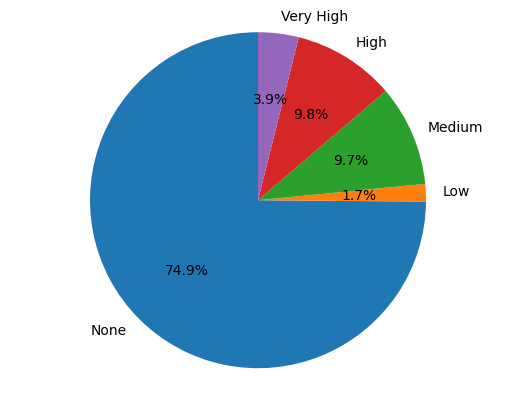

In [ ]:
## grafico circular com a percentagem de cada categoria do target
labels = 'None', 'Low', 'Medium', 'High', 'Very High'
# convert numpy array to dataframe
p = pd.DataFrame(predictions)

sizes = [p.value_counts()[0], p.value_counts()[1], p.value_counts()[2], p.value_counts()[3], p.value_counts()[4]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')

plt.show()

Precision: 0.8856624319419237
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      1565
         1.0       0.46      0.28      0.35        79
         2.0       0.66      0.64      0.65       226
         3.0       0.69      0.76      0.72       227
         4.0       0.72      0.76      0.74       107

    accuracy                           0.89      2204
   macro avg       0.70      0.68      0.69      2204
weighted avg       0.88      0.89      0.88      2204



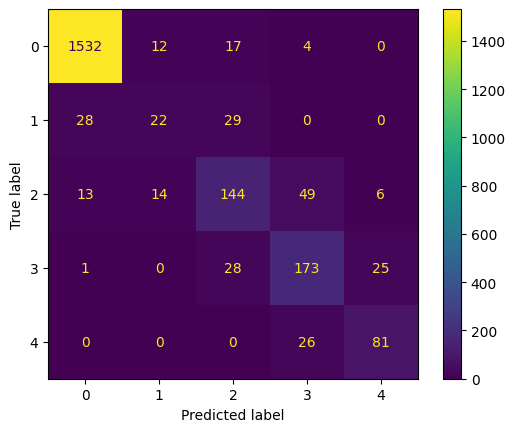

In [ ]:
xgboost.fit(x_train2, y_train2)
predictions = xgboost.predict(x_test2)

predictions

from sklearn.metrics import precision_score
precision = precision_score(y_test2, predictions, average='micro')

print(f'Precision: {precision}')

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4])
disp.plot()
print(classification_report(y_test2, predictions))